In [2]:
import streamlit as st

st.title("IIDA Daiki")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [3]:
import streamlit as st

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from FuncLaserScattering import delete_distance, skip_distance, correct_distance, correct_intensity, smoothing_apple, fitting

In [17]:
func = 'ok'
if func in ['Farrell','ML','MG2']:
    print(func)

In [4]:
total_df = pd.read_csv('Profile_FirstStorage/633nm/Profile_FirstStorage_00_633nm.csv')

# 距離と輝度（強度）を分割
distance = total_df.iloc[:,0]
apple_df = total_df.drop('distance (mm)',axis=1)


#####解析範囲外の領域を削除#####
distance_30mm, apple_df_30mm = delete_distance(distance, apple_df)

#####散乱距離の補正#####
distance_30mm = correct_distance(distance_30mm)

#####散乱強度の補正#####
apple_df_30mm = correct_intensity(distance_30mm,apple_df_30mm)

#####プロファイルの平滑化#####
distance_smooth, apple_smooth = smoothing_apple(distance_30mm, apple_df_30mm)

#####プロファイルの間引き (1mm間隔)#####
distance_eq, apple_smooth_eq = skip_distance(distance_smooth, apple_smooth)

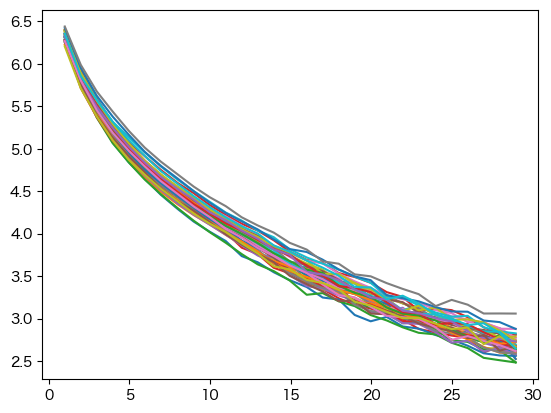

In [6]:
plt.plot(distance_eq,apple_smooth_eq)
plt.show()